## Product and Customer Analytics

In [56]:
# Import  the appropriate libraries

import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
%matplotlib inline

In [49]:
import pip
pip.main(["install", "openpyxl"])


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


0

In [60]:
# import the dataset from UCI machine learning laboratory site. It is an excel file
df = pd.read_excel('Online Retail.xlsx', sheet_name='Online Retail')

In [61]:
# Check the shape
df.shape

(541909, 8)

In [63]:
# Use the head function
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Distribution of the Quantity Column

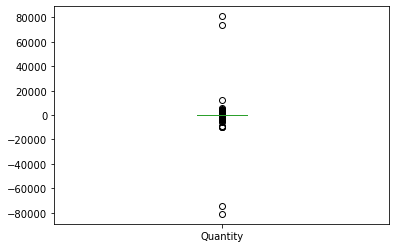

In [64]:
# Create a box plot to identify outliers
dx = df['Quantity'].plot.box()



In [65]:
# Filter out the negative quantity orders
df = df.loc[df['Quantity']>0]

In [66]:
# Check the shape again
df.shape


(531285, 8)

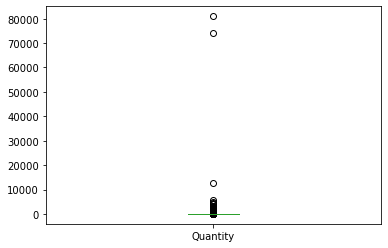

In [67]:
# Create a Box plot without negative quantity
dx = df['Quantity'].plot.box()

## Time Series Trends

Number of orders

Revenue

In [68]:
# resample function resamples the data and converts the data into the desired 
# Summarize the data on a monthly basis 
m_orders_df = df.set_index('InvoiceDate')['InvoiceNo'].resample('M').nunique()

In [69]:
m_orders_df

InvoiceDate
2010-12-31    1629
2011-01-31    1120
2011-02-28    1126
2011-03-31    1531
2011-04-30    1318
2011-05-31    1731
2011-06-30    1576
2011-07-31    1540
2011-08-31    1409
2011-09-30    1896
2011-10-31    2129
2011-11-30    2884
2011-12-31     839
Freq: M, Name: InvoiceNo, dtype: int64

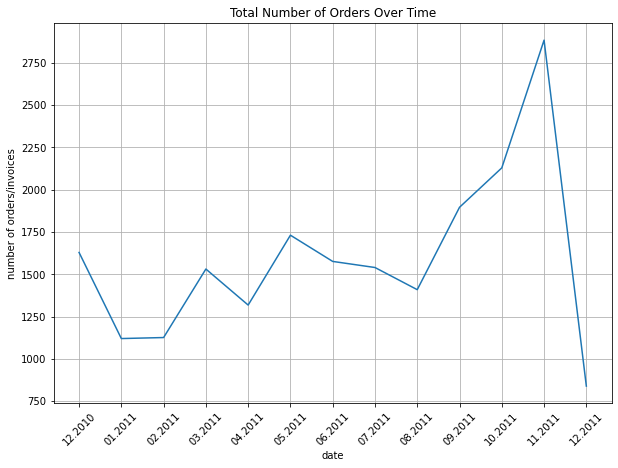

In [70]:
# Create a Line Chart for the data 
ax = pd.DataFrame(m_orders_df.values).plot(
    grid=True,
    figsize=(10,7),
    legend=False
)

ax.set_xlabel('date')
ax.set_ylabel('number of orders/invoices')
ax.set_title('Total Number of Orders Over Time')

# use x.strftime('%m.%Y'), where x is the Pythondate object, %m is the placeholder for
# the month value, and %Y is the placeholder for the year value. The strftime function
# of the Pythondate object formats the date into the given format.

plt.xticks(
    range(len(m_orders_df.index)), 
    [x.strftime('%m.%Y') for x in m_orders_df.index], 
    rotation=45
)

plt.show()

In [71]:
# Get all invoice dates from December 1, 2011 
invoice_dates = df.loc[
    df['InvoiceDate'] >= '2011-12-01',
    'InvoiceDate'
]

In [72]:
# Print Min and Max dates in that series
print('Min date: %s\nMax date: %s' % (invoice_dates.min(), invoice_dates.max()))

Min date: 2011-12-01 08:33:00
Max date: 2011-12-09 12:50:00


### Q. What do you observe? 

From the graph and the table we can say from the month august  have the number of orders increasing while the month december have the lowest number of orders because there are only nine days which makes is unuseful of the month December to analyze.

In [73]:
# Remove the December 2011 data
df = df.loc[df['InvoiceDate'] < '2011-12-01']

# Recalculate the monthly distribution
m_orders_df = df.set_index('InvoiceDate')['InvoiceNo'].resample('M').nunique()

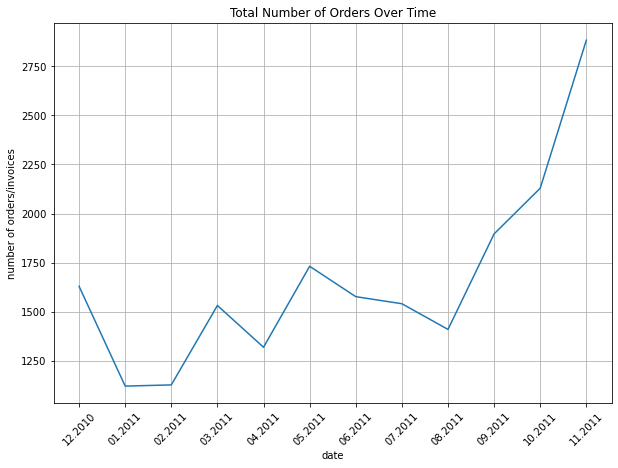

In [75]:
# Create the line chart again
# Create a Line Chart for the data 
ax = pd.DataFrame(m_orders_df.values).plot(
    grid=True,
    figsize=(10,7),
    legend=False
)

ax.set_xlabel('date')
ax.set_ylabel('number of orders/invoices')
ax.set_title('Total Number of Orders Over Time')

# use x.strftime('%m.%Y'), where x is the Pythondate object, %m is the placeholder for
# the month value, and %Y is the placeholder for the year value. The strftime function
# of the Pythondate object formats the date into the given format.

plt.xticks(
    range(len(m_orders_df.index)), 
    [x.strftime('%m.%Y') for x in m_orders_df.index], 
    rotation=45
)

plt.show()

In [76]:
# Calculate sales
df['Sales'] = df['Quantity'] * df['UnitPrice']

# Look at monthly revenue data by using sum as an aggregate function
m_revenue_df = df.set_index('InvoiceDate')['Sales'].resample('M').sum()

In [77]:
m_revenue_df

InvoiceDate
2010-12-31     823746.140
2011-01-31     691364.560
2011-02-28     523631.890
2011-03-31     717639.360
2011-04-30     537808.621
2011-05-31     770536.020
2011-06-30     761739.900
2011-07-31     719221.191
2011-08-31     737014.260
2011-09-30    1058590.172
2011-10-31    1154979.300
2011-11-30    1509496.330
Freq: M, Name: Sales, dtype: float64

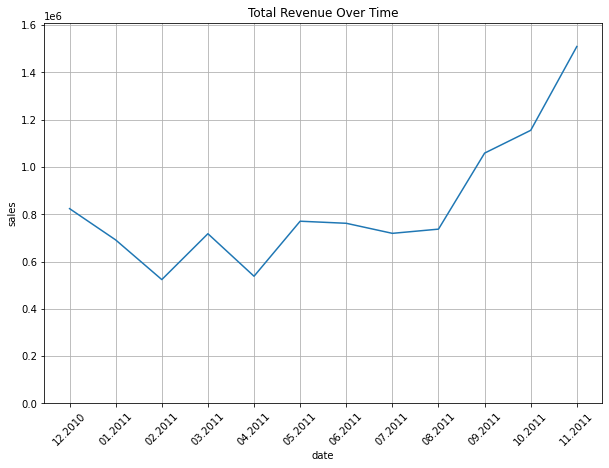

In [78]:
# Create a Line Plot for revenue
ax = pd.DataFrame(m_revenue_df.values).plot(
    grid=True,
    figsize=(10,7),
    legend=False
)

ax.set_xlabel('date')
ax.set_ylabel('sales')
ax.set_title('Total Revenue Over Time')

ax.set_ylim([0, max(m_revenue_df.values)+100000])

plt.xticks(
    range(len(m_revenue_df.index)),
    [x.strftime('%m.%Y') for x in m_revenue_df.index],
    rotation=45
)
plt.show()

### Q Do you see a similar pattern with the order by month line chart? Comment

The above graphs and the previous both have similar trends like february and april have the lowest peak while in the month march and may there is a rise in peak but with same graph above number of sales increasing from august.

### Repeat Customers

In [79]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [80]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
516364,579885,85034C,3 ROSE MORRIS BOXED CANDLES,4,2011-11-30 17:37:00,1.25,15444.0,United Kingdom,5.00
516365,579885,21742,LARGE ROUND WICKER PLATTER,2,2011-11-30 17:37:00,5.95,15444.0,United Kingdom,11.90
516366,579885,23084,RABBIT NIGHT LIGHT,6,2011-11-30 17:37:00,2.08,15444.0,United Kingdom,12.48
516367,579885,21257,VICTORIAN SEWING BOX MEDIUM,1,2011-11-30 17:37:00,7.95,15444.0,United Kingdom,7.95
516368,579885,21259,VICTORIAN SEWING BOX SMALL,1,2011-11-30 17:37:00,5.95,15444.0,United Kingdom,5.95


### Q. What do you notice with the invoice number?

As from the both tables we can the there is a repition of Invoice number like '536365' and '579885' are the single invoices on the different line because that product sales more than once.

### Calculate the repeat customers

In [81]:
# Aggregate the raw data for each Invoice No.
invoice_df = df.groupby(
    by=['InvoiceNo', 'InvoiceDate']
).agg({
    'Sales': sum,
    'CustomerID': max,
    'Country': max,
}).reset_index()

In [82]:
invoice_df.head()

,InvoiceNo,InvoiceDate,Sales,CustomerID,Country
0,536365,2010-12-01 08:26:00,139.12,17850.0,United Kingdom
1,536366,2010-12-01 08:28:00,22.20,17850.0,United Kingdom
2,536367,2010-12-01 08:34:00,278.73,13047.0,United Kingdom
3,536368,2010-12-01 08:34:00,70.05,13047.0,United Kingdom
4,536369,2010-12-01 08:35:00,17.85,13047.0,United Kingdom


In [83]:
# Aggregate by month
#Group by Month and CustomerID. 
# Filter selects customers who have more than one record in the group
# Basically customers with more than one order in a month

m_repeat_customers_df = invoice_df.set_index('InvoiceDate').groupby([
    pd.Grouper(freq='M'), 'CustomerID'
]).filter(lambda x: len(x) > 1).resample('M').nunique()['CustomerID']

In [84]:
m_repeat_customers_df

InvoiceDate
2010-12-31    263
2011-01-31    153
2011-02-28    153
2011-03-31    203
2011-04-30    170
2011-05-31    281
2011-06-30    220
2011-07-31    227
2011-08-31    198
2011-09-30    272
2011-10-31    324
2011-11-30    541
Freq: M, Name: CustomerID, dtype: int64

In [85]:

# Calculate the unique customers
m_unique_customers_df = df.set_index('InvoiceDate')['CustomerID'].resample('M').nunique()

In [86]:
m_unique_customers_df

InvoiceDate
2010-12-31     885
2011-01-31     741
2011-02-28     758
2011-03-31     974
2011-04-30     856
2011-05-31    1056
2011-06-30     991
2011-07-31     949
2011-08-31     935
2011-09-30    1266
2011-10-31    1364
2011-11-30    1665
Freq: M, Name: CustomerID, dtype: int64

In [87]:
# Compare the repeat and unique customers by month and calculate percentage by month
m_repeat_percentage = m_repeat_customers_df/m_unique_customers_df*100.0
m_repeat_percentage

InvoiceDate
2010-12-31    29.717514
2011-01-31    20.647773
2011-02-28    20.184697
2011-03-31    20.841889
2011-04-30    19.859813
2011-05-31    26.609848
2011-06-30    22.199798
2011-07-31    23.919916
2011-08-31    21.176471
2011-09-30    21.484992
2011-10-31    23.753666
2011-11-30    32.492492
Freq: M, Name: CustomerID, dtype: float64

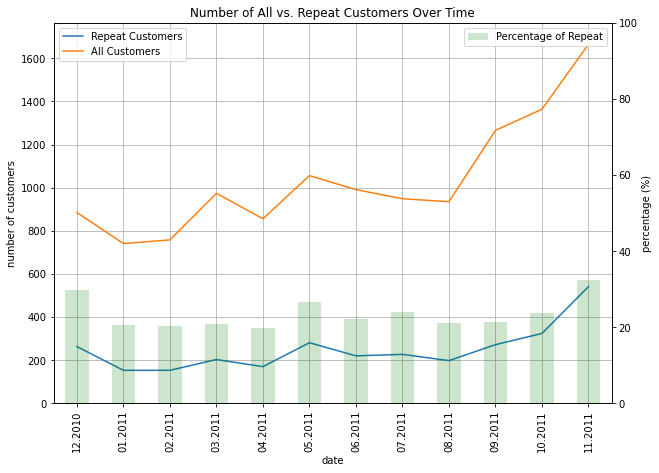

In [88]:
# Visualize thsese two in a dual axis chart

plot1 = pd.DataFrame(m_repeat_customers_df.values).plot(
    figsize=(10,7))

pd.DataFrame(m_unique_customers_df.values).plot(
    ax=plot1,
    grid=True
)

plot2 = pd.DataFrame(m_repeat_percentage.values).plot.bar(
    ax=plot1,
    grid=True,
    secondary_y=True,# for dual axis with different scale
    color='green',
    alpha=0.2
)

plot1.set_xlabel('date')
plot1.set_ylabel('number of customers')
plot1.set_title('Number of All vs. Repeat Customers Over Time')

plot2.set_ylabel('percentage (%)')

plot1.legend(['Repeat Customers', 'All Customers'])
plot2.legend(['Percentage of Repeat'], loc='upper right')

plot1.set_ylim([0, m_unique_customers_df.values.max()+100])
plot2.set_ylim([0, 100])

plt.xticks(
    range(len(m_repeat_customers_df.index)), 
    [x.strftime('%m.%Y') for x in m_repeat_customers_df.index], 
    rotation=45
)
plt.show()

### Q. Comment on the distribution

A. Each month, an increase in the number of users is seen, and the overall number of customers and repeat customers follow a fairly similar pattern. This indicates that new customers have come on board during the year and have made purchases as the months have passed.

In [89]:
# Calculate Monthly revenue of repeat customers
m_rev_repeat_customers_df = invoice_df.set_index('InvoiceDate').groupby([
    pd.Grouper(freq='M'), 'CustomerID'
]).filter(lambda x: len(x) > 1).resample('M').sum()['Sales']


# Calculate and show the % of revenue for repeat and all customers by month
m_rev_perc_repeat_customers_df = m_rev_repeat_customers_df/m_revenue_df * 100.0

In [90]:
m_rev_repeat_customers_df

InvoiceDate
2010-12-31    359170.60
2011-01-31    222124.00
2011-02-28    191229.37
2011-03-31    267390.48
2011-04-30    195474.18
2011-05-31    378197.04
2011-06-30    376307.26
2011-07-31    317475.00
2011-08-31    317134.25
2011-09-30    500663.36
2011-10-31    574006.87
2011-11-30    713775.85
Freq: M, Name: Sales, dtype: float64

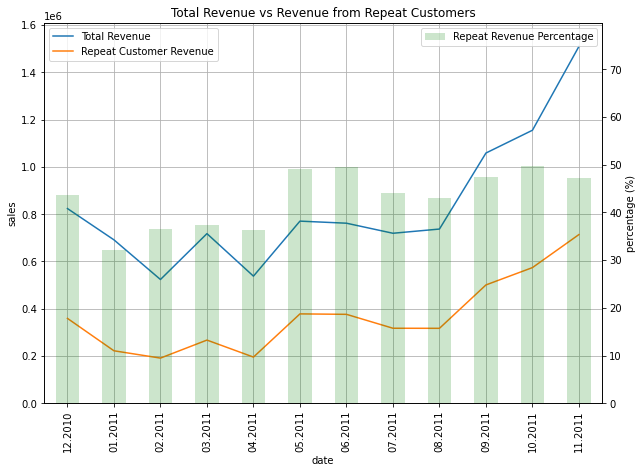

In [91]:
# Plot the  chart for Revenue and % (Dual axis chart)
plot1 = pd.DataFrame(m_revenue_df.values).plot(
    figsize=(10,7))

pd.DataFrame(m_rev_repeat_customers_df.values).plot(
    ax=plot1,
    grid=True
)

plot2 = pd.DataFrame(m_rev_perc_repeat_customers_df.values).plot.bar(
    ax=plot1,
    grid=True,
    secondary_y=True, # for dual axis with different scale
    color='green',
    alpha=0.2
)
plot1.set_xlabel('date')
plot1.set_ylabel('sales')
plot1.set_title('Total Revenue vs Revenue from Repeat Customers')

plot1.legend(['Total Revenue', 'Repeat Customer Revenue'])

plot1.set_ylim([0, max(m_revenue_df.values)+100000])

plot2.set_ylim([0, max(m_rev_perc_repeat_customers_df.values)+30])
plot2.set_ylabel('percentage (%)')
plot2.legend(['Repeat Revenue Percentage'])

plot2.set_xticklabels([
    x.strftime('%m.%Y') for x in m_rev_perc_repeat_customers_df.index
])

plt.show()

### Q. Comment on the distribution

A. Total sales and revenue from returning consumers are directly correlated. The income grows throughout the course of the months in both situations.

#### Trending Items Over Time (How customers enagage with individual products)
#### By Quantity

In [92]:
# Group the datafarme by month with stock code which is really the product ID
m_item_df = pd.DataFrame(df.set_index('InvoiceDate').groupby([
        pd.Grouper(freq='M'), 'StockCode'
    ])['Quantity'].sum()
                        )

In [93]:
# Lets find out what items were sold the most by quantity on November 30, 2011
# Rank items by the last month sales by sorting by quantity
last_m_sorted_df = m_item_df.loc['2011-11-30'].sort_values(
    by='Quantity', ascending=False
).reset_index()

### By Sales

In [94]:
# Group the datafarme by month with stock code which is really the product ID and 
# calculate the sales
m_rev_df = pd.DataFrame(df.set_index('InvoiceDate').groupby([
    pd.Grouper(freq= 'M'), 'StockCode'
])['Sales'].sum()
                        )

# Lets find out what items were sold the most by sales on November 30, 2011
last_m_rev_sorted_df = m_rev_df.loc['2011-11-30'].sort_values(
    by='Sales', ascending=False
).reset_index()

In [95]:
# Print both the dataframes
print(last_m_sorted_df.head())
print(last_m_rev_sorted_df.head())

  StockCode  Quantity
0     23084     14954
1     84826     12551
2     22197     12460
3     22086      7908
4    85099B      5909
  StockCode     Sales
0       DOT  36905.40
1     23084  34556.72
2     22086  28985.04
3     22197  14195.60
4    85123A  14136.70


In [96]:
# Use the top 5 items by quantity and find the monthly sales for those items 
m_item_df = pd.DataFrame(
    df.loc[
        df['StockCode'].isin([23084, 84826, 22197, 22086, '85099'])
    ].set_index('InvoiceDate').groupby([
        pd.Grouper(freq='M'), 'StockCode'
    ])['Sales'].sum()
)
m_item_df

Sales
InvoiceDate StockCode          
2010-12-31  22086       9225.80
            22197       2630.79
            84826        119.10
2011-01-31  22086        143.32
            22197       1495.48
            84826        100.80
2011-02-28  22086         24.95
            22197       2127.00
            84826         17.70
2011-03-31  22086        232.01
            22197       3032.81
            84826         51.00
2011-04-30  22086         44.03
            22197       1495.57
            84826          0.85
2011-05-31  22086         65.19
            22197       5151.63
            23084       2279.57
2011-06-30  22086        910.88
            22197       1706.91
            23084       3326.87
            84826          3.40
2011-07-31  22086       1077.93
            22197       1540.00
            23084        668.59
            84826          1.70
2011-08-31  22086       1334.94
            22197       4133.35
            23084       3533.57
            84826         61.20
2011-09-30  22086       6006.10
            22197       3607.13
            23084        699.78
2011-10-31  22086      10031.39
            22197       4813.95
            23084      12256.87
            84826          9.35
2011-11-30  22086      28985.04
            22197      14195.60
            23084      34556.72
            84826          9.35

In [97]:
# Use the top 5 items by quantity and find the monthly sales for those items 
m_item_df = pd.DataFrame(
    df.loc[
        df['StockCode'].isin([23084, 84826, 22197, 22086, '85099B'])
    ].set_index('InvoiceDate').groupby([
        pd.Grouper(freq='M'), 'StockCode'
    ])['Sales'].sum()
)
m_item_df

Sales
InvoiceDate StockCode          
2010-12-31  22086       9225.80
            22197       2630.79
            84826        119.10
            85099B      4019.15
2011-01-31  22086        143.32
            22197       1495.48
            84826        100.80
            85099B      5047.65
2011-02-28  22086         24.95
            22197       2127.00
            84826         17.70
            85099B      5617.24
2011-03-31  22086        232.01
            22197       3032.81
            84826         51.00
            85099B     10118.38
2011-04-30  22086         44.03
            22197       1495.57
            84826          0.85
            85099B      4878.08
2011-05-31  22086         65.19
            22197       5151.63
            23084       2279.57
            85099B      7122.73
2011-06-30  22086        910.88
            22197       1706.91
            23084       3326.87
            84826          3.40
            85099B      7247.98
2011-07-31  22086       1077.93
            22197       1540.00
            23084        668.59
            84826          1.70
            85099B      6253.87
2011-08-31  22086       1334.94
            22197       4133.35
            23084       3533.57
            84826         61.20
            85099B     10796.56
2011-09-30  22086       6006.10
            22197       3607.13
            23084        699.78
            85099B      8884.33
2011-10-31  22086      10031.39
            22197       4813.95
            23084      12256.87
            84826          9.35
            85099B     10485.81
2011-11-30  22086      28985.04
            22197      14195.60
            23084      34556.72
            84826          9.35
            85099B     11641.37

In [98]:
# transform this data into a tabular format where columns are the individual 
# stock codes and the rows are the invoice dates
itmes_df = m_item_df.reset_index().pivot('InvoiceDate','StockCode').fillna(0)
itmes_df = itmes_df.reset_index()
itmes_df = itmes_df.set_index('InvoiceDate')
itmes_df.columns = itmes_df.columns.droplevel(0)

In [99]:
itmes_df

StockCode,22086,22197,23084,84826,85099B
InvoiceDate,,,,,
2010-12-31,9225.80,2630.79,0.00,119.10,4019.15
2011-01-31,143.32,1495.48,0.00,100.80,5047.65
2011-02-28,24.95,2127.00,0.00,17.70,5617.24
2011-03-31,232.01,3032.81,0.00,51.00,10118.38
2011-04-30,44.03,1495.57,0.00,0.85,4878.08
2011-05-31,65.19,5151.63,2279.57,0.00,7122.73
2011-06-30,910.88,1706.91,3326.87,3.40,7247.98
2011-07-31,1077.93,1540.00,668.59,1.70,6253.87
2011-08-31,1334.94,4133.35,3533.57,61.20,10796.56


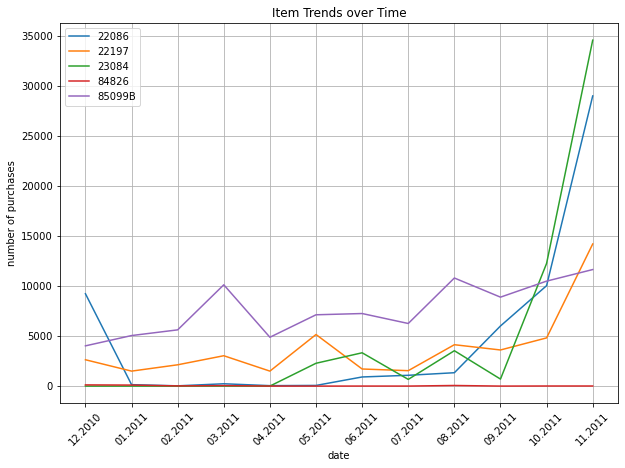

In [100]:
# Time series plot for the top 5 items
plot1 = pd.DataFrame(itmes_df.values).plot(
    figsize=(10,7),
    grid=True,
)

plot1.set_ylabel('number of purchases')
plot1.set_xlabel('date')
plot1.set_title('Item Trends over Time')

plot1.legend(itmes_df.columns, loc='upper left')

plt.xticks(
    range(len(itmes_df.index)), 
    [x.strftime('%m.%Y') for x in itmes_df.index], 
    rotation=45
)

plt.show()

### Q. What do you observe?

A. From the above line graph, it depicts that the product 84826 have not been purchased throughout the year. In the starting few months of the 2011  the product 23084 and 84826 not being purchased but there slighlty increasing from the month april to august with fluctuations. There was drop in the month of september. In last months of the year there was significant rise seen in the number of purchsing the product. As compared to other products, product 85099B have the highest average for the purchasing throughout the year  

In [109]:
print(last_m_rev_sorted_df.head())

  StockCode     Sales
0       DOT  36905.40
1     23084  34556.72
2     22086  28985.04
3     22197  14195.60
4    85123A  14136.70


In [110]:
# Use the top 5 items by sales and find the monthly sales for those items 
m_sales_df = pd.DataFrame(
    df.loc[
        df['StockCode'].isin(['DOT', 23084, 22806, 22197, '85123A'])
    ].set_index('InvoiceDate').groupby([
        pd.Grouper(freq='M'), 'StockCode'
    ])['Sales'].sum()
)
m_sales_df

Sales
InvoiceDate StockCode          
2010-12-31  22197       1645.82
            22806         35.40
            85123A      9602.05
2011-01-31  22197       1299.45
            22806         17.70
            85123A     14979.75
2011-02-28  22197       1864.57
            22806         17.70
            85123A      4912.65
2011-03-31  22197       1575.50
            22806        123.90
            85123A      5262.50
2011-04-30  22197       1384.73
            85123A      9581.65
2011-05-31  22197       4978.50
            22806         23.60
            23084       2161.70
            85123A     10700.42
2011-06-30  22197       1552.85
            23084       3005.12
            85123A      4401.90
2011-07-31  22197       1397.27
            22806        134.20
            23084        435.20
            85123A      8303.97
2011-08-31  22197       3916.42
            22806          2.95
            23084       3395.20
            85123A      5498.10
            DOT           11.17
2011-09-30  22197       2881.98
            22806         91.45
            23084        235.14
            85123A      6789.00
            DOT         1681.83
2011-10-31  22197       4260.76
            22806         20.65
            23084      11955.35
            85123A      4564.54
            DOT         3408.76
2011-11-30  22197       6476.38
            22806         53.10
            23084      23268.73
            85123A     13855.83
            DOT         5205.34

In [111]:
# transform this data into a tabular format where columns are the individual 
# stock codes and the rows are the invoice dates
s_itmes_df = m_sales_df.reset_index().pivot('InvoiceDate','StockCode').fillna(0)
s_itmes_df = s_itmes_df.reset_index()
s_itmes_df = s_itmes_df.set_index('InvoiceDate')
s_itmes_df.columns = s_itmes_df.columns.droplevel(0)

s_itmes_df

StockCode,22197,22806,23084,85123A,DOT
InvoiceDate,,,,,
2010-12-31,1645.82,35.40,0.00,9602.05,0.00
2011-01-31,1299.45,17.70,0.00,14979.75,0.00
2011-02-28,1864.57,17.70,0.00,4912.65,0.00
2011-03-31,1575.50,123.90,0.00,5262.50,0.00
2011-04-30,1384.73,0.00,0.00,9581.65,0.00
2011-05-31,4978.50,23.60,2161.70,10700.42,0.00
2011-06-30,1552.85,0.00,3005.12,4401.90,0.00
2011-07-31,1397.27,134.20,435.20,8303.97,0.00
2011-08-31,3916.42,2.95,3395.20,5498.10,11.17


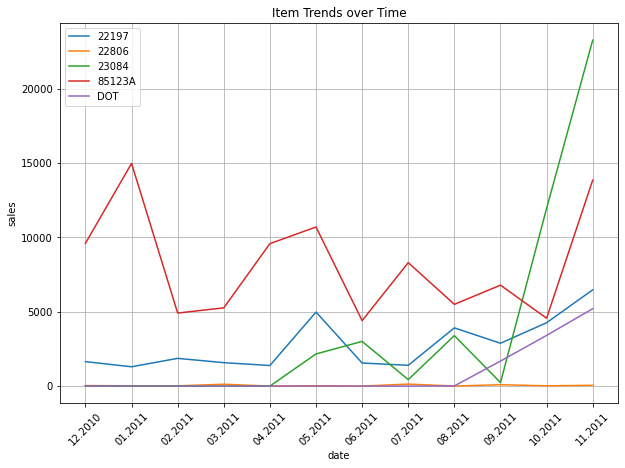

In [112]:
# Time series plot for the top 5 items
plot1 = pd.DataFrame(s_itmes_df.values).plot(
    figsize=(10,7),
    grid=True,
)

plot1.set_ylabel('sales')
plot1.set_xlabel('date')
plot1.set_title('Item Trends over Time')

plot1.legend(s_itmes_df.columns, loc='upper left')

plt.xticks(
    range(len(s_itmes_df.index)), 
    [x.strftime('%m.%Y') for x in s_itmes_df.index], 
    rotation=45
)

plt.show()

### Q. What do you observe?

A. Product 85123A has produced the greatest sales on average throughout the course of the year. As of September 2011, sales of product 23084 have significantly increased whereas those of product 22806 have yet to produce any appreciable sales.

In [105]:
# Drop NaN records
df = df[pd.notnull(df['CustomerID'])]

In [106]:
df.shape

(380620, 9)

In [107]:
 # Summarize the data for each order or InvoiceNo

orders_df = df.groupby(['CustomerID', 'InvoiceNo']).agg({
            'Sales': sum,
            'InvoiceDate': max
        })

In [108]:
orders_df

Sales         InvoiceDate
CustomerID InvoiceNo                              
12346.0    541431     77183.60 2011-01-18 10:01:00
12347.0    537626       711.79 2010-12-07 14:57:00
           542237       475.39 2011-01-26 14:30:00
           549222       636.25 2011-04-07 10:43:00
           556201       382.52 2011-06-09 13:01:00
...                        ...                 ...
18283.0    578262       313.65 2011-11-23 13:27:00
           579673       223.61 2011-11-30 12:59:00
18287.0    554065       765.28 2011-05-22 10:39:00
           570715      1001.32 2011-10-12 10:23:00
           573167        70.68 2011-10-28 09:29:00

[17758 rows x 2 columns]

### Q. Comment on the results of product analytics and Customer Analytics from a marketing perspective

A. Consumers grew throughout the course of the time period, and as customers grew, so did the number of things bought. Stock Code "22806" reveals a low and steady sales. Therefore, from a marketing perspective, we will suggest that we remove Stoc item "22806" and replace it with a better-selling item or redirect resources that would have gone to item "22806" to other goods to boost and enhance sales.